## PHASE 3 PROJECT

## Syriatel Customer Churn Prediction Project

## 1) BUSINESS UNDERSTANDING

Syriatel has a problem: many customers are leaving and going to other companies. They want to make a tool that can predict when a customer might leave. They'll look at their data to find out why customers are leaving. Then, they'll make a model to predict when someone might leave. This will help them figure out how to keep customers happy and stop them from leaving

## objective

- To find out why customers are leaving.
- To see which factors affect customer leaving the most.
- To make a model that can predict if a customer might leave.
- To check how well the model works and compare it with others.
- To find ways to stop customers from leaving and keep more of them.
- To make a plan to use the ideas from the model to stop customers from leaving.

# Importing relevant libraries

In [2]:
#Importing relevant libraries to be used.

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [4]:
#loading the dataset
df = pd.read_csv("churn_in_telcom.csv.csv")
#making a copy of the dataset
df = df.copy(deep = True)
#checking the first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.shape

(3333, 21)

Check for Unique Values

In [7]:
for dataset in df:
    print("For {},{} unique values present".format(dataset,df[dataset].nunique()))

For state,51 unique values present
For account length,212 unique values present
For area code,3 unique values present
For phone number,3333 unique values present
For international plan,2 unique values present
For voice mail plan,2 unique values present
For number vmail messages,46 unique values present
For total day minutes,1667 unique values present
For total day calls,119 unique values present
For total day charge,1667 unique values present
For total eve minutes,1611 unique values present
For total eve calls,123 unique values present
For total eve charge,1440 unique values present
For total night minutes,1591 unique values present
For total night calls,120 unique values present
For total night charge,933 unique values present
For total intl minutes,162 unique values present
For total intl calls,21 unique values present
For total intl charge,162 unique values present
For customer service calls,10 unique values present
For churn,2 unique values present


In [8]:
# Numerical Columns
print(f"Numerical Columns: {df.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


## 2.DATA PREPARATION 

Check for duplicates

In [9]:
df.duplicated().sum()

0

Check for Unique Values

In [10]:
for dataset in df:
    print("For {},{} unique values present".format(dataset,df[dataset].nunique()))

For state,51 unique values present
For account length,212 unique values present
For area code,3 unique values present
For phone number,3333 unique values present
For international plan,2 unique values present
For voice mail plan,2 unique values present
For number vmail messages,46 unique values present
For total day minutes,1667 unique values present
For total day calls,119 unique values present
For total day charge,1667 unique values present
For total eve minutes,1611 unique values present
For total eve calls,123 unique values present
For total eve charge,1440 unique values present
For total night minutes,1591 unique values present
For total night calls,120 unique values present
For total night charge,933 unique values present
For total intl minutes,162 unique values present
For total intl calls,21 unique values present
For total intl charge,162 unique values present
For customer service calls,10 unique values present
For churn,2 unique values present


## 3.DATA ANALYSIS

3.1 Univariate Analysis

In [12]:
#Check total count of current customers that have churned (True) and those that didn't (False)
print(df.churn.value_counts())

False    2850
True      483
Name: churn, dtype: int64


In [13]:
# printing the unique values of the categorical variables

print(df['churn'].unique())
print(df['international plan'].unique())
print(df['voice mail plan'].unique())
print(df['customer service calls'].unique())
print(df['area code'].unique())

[False  True]
['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]
[415 408 510]


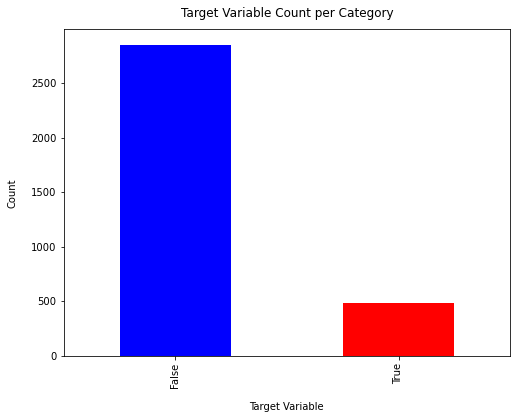

In [14]:
# visualization of the target variable
churn_counts = df['churn'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Target Variable Count per Category", y=1.02)
plt.show()

Let's understand Churn rate which is our main focus that is  rate at which customers are leaving and going to other companies over a certain period of time.

In [15]:
#Check total count of current customers that have churned (True) and those that didn't (False)
print(df.churn.value_counts())

False    2850
True      483
Name: churn, dtype: int64


In [16]:
#Check percent of current customers that have churned (True) and those that didn't (False)
df["churn"].value_counts(normalize=True) * 100

False    85.508551
True     14.491449
Name: churn, dtype: float64

Out of the 3,333 customers in the dataset, 483 have ended their contract with SyriaTel, which accounts for 14.5% of customers lost.

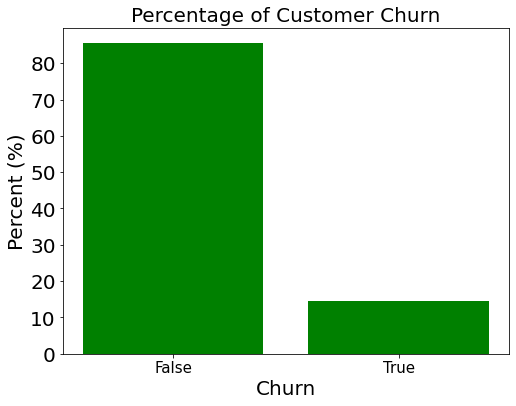

In [20]:
#visualization of the churn rate
fig,ax = plt.subplots(figsize=(8,6))
plt.bar(x = df["churn"].unique(), height = round(df["churn"].value_counts(normalize=True)*100, 2), color= "green")
plt.xticks(ticks=[0,1], labels=["False", "True"], fontsize = 15)
plt.yticks(fontsize = 20)
ax.set_xlabel("Churn", fontsize = 20)
ax.set_ylabel("Percent (%)", fontsize = 20)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_title("Percentage of Customer Churn",fontsize = 20)
plt.show()

Based on the results, the data shows a significant imbalance.Before modeling, it's important to deal with this imbalance in the data, as unbalanced features can lead the model to make inaccurate predictions.

In [33]:
#Checking the distribution of categorical features
def plot_categorical_distribution(Telecom1_df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, data=df,color='orange', order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

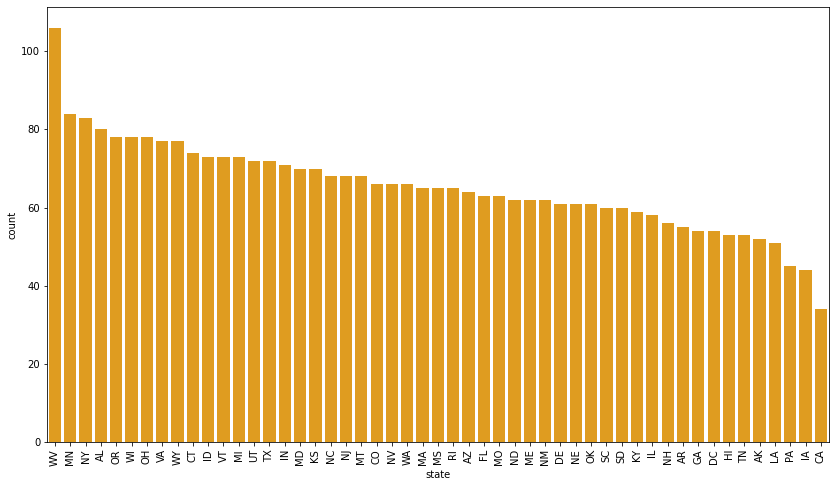

In [34]:
plot_categorical_distribution(df,feature='state')

From the visualizaton above the states with highest customers are West Virginia and Wisconsin while Carlifonia has the lowest number of customers.

3.2 Bivariate Analysis

Let's analyze the data by grouping it according to "State" to identify any trends or patterns, such as which states exhibit the highest churn rates.

In [21]:
#groups states and looks at churn and not churn rates 
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percent']
states = states.reset_index()
states

,state,churn,percent
0,AK,False,0.942308
1,AK,True,0.057692
2,AL,False,0.900000
3,AL,True,0.100000
4,AR,False,0.800000
...,...,...,...
97,WI,True,0.089744
98,WV,False,0.905660
99,WV,True,0.094340
100,WY,False,0.883117


The table above displays the retention rates of different states in descending order.

Distribution of the numerical features

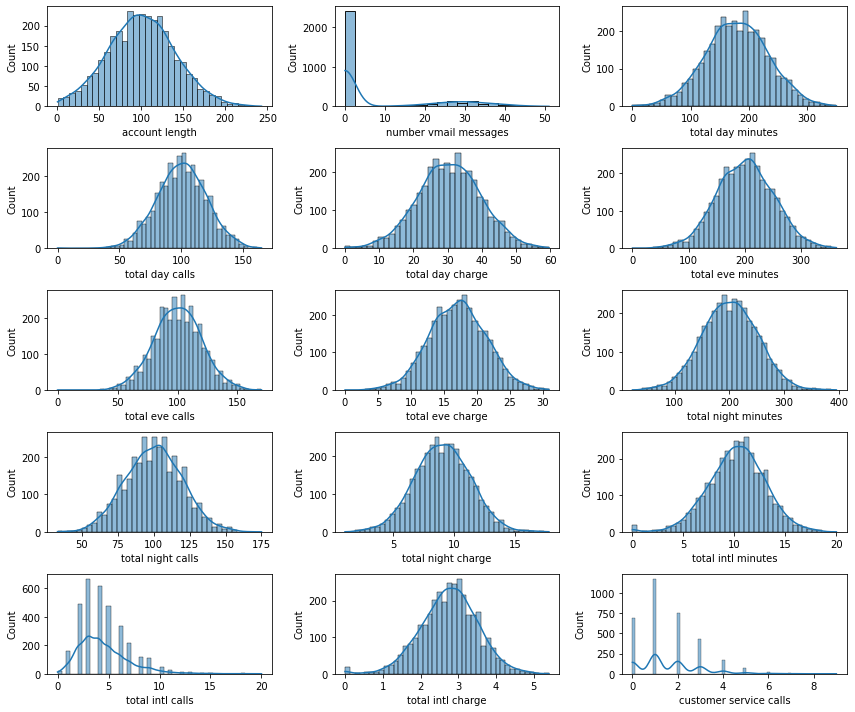

In [22]:
# List of numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge',
                    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes 
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

- The visualization above provides insights into the distribution of numerical features.
- Account length: The distribution is positively skewed, suggesting that most customers have shorter account lengths. This skewness might introduce challenges in accurately predicting customer churn, as longer account lengths could be more reliable indicators.
- Number of Voice Mail Messages: The distribution appears relatively even, indicating that this feature may not strongly predict customer churn.
- Total Day Minutes, Calls, and Charge: These features exhibit positively skewed distributions with significant overlap between classes, indicating potential noise in the data.
- Total Evening Minutes, Calls, and Charge: Similar to the Total Day features, these also display positively skewed distributions and overlap between classes, suggesting noise in the data.
- Total Nighttime Minutes, Calls, and Charge: The distributions are negatively skewed, indicating that most customers have less activity at night. This skewness might introduce inaccuracies in predicting churn, as higher nighttime activity could be a more reliable predictor.
- Total International Minutes, Calls, and Charge: These features demonstrate patterns similar to the Total Day features, suggesting potential noise and overlap between classes.

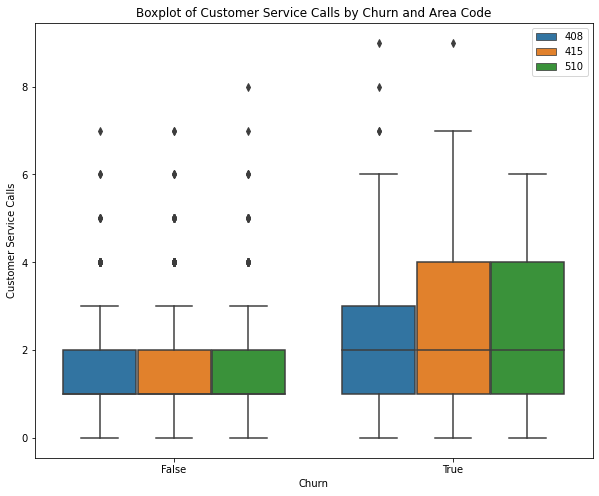

In [41]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code')
plt.legend(loc='upper right')
plt.title('Boxplot of Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

The boxplot suggests that a significant portion of customers who terminated their contracts belong to area codes 415 and 510. Additionally, there are numerous outliers present in the dataset.

Now that we've gained a basic understanding of our data, let's categorize the columns into numerical and categorical ones.

To gain further understand into churn and retention rates, let's establish the customer count per state.

In [42]:
summary = df.groupby(['state'])['phone number'].count()
top8 = summary.nlargest(8)
top8

state
WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
Name: phone number, dtype: int64

From the above we can see the top 8 states that had the highest number of customers

In [45]:
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature based on churn rate in the given data.
    """
    plt.figure(figsize=(10, 4))
    
    # Calculate churn rate for each category
    churn_rate = df.groupby(feature)["churn"].mean().sort_values(ascending=False)
    
    # Select top 8 categories based on churn rate
    top_8_categories = churn_rate.head(8).index.tolist()
    
    # Plot countplot with churn distribution
    sns.countplot(x=feature, hue="churn", data=df, order=top_8_categories)
    
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Distribution of {feature} based on Churn Rate')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

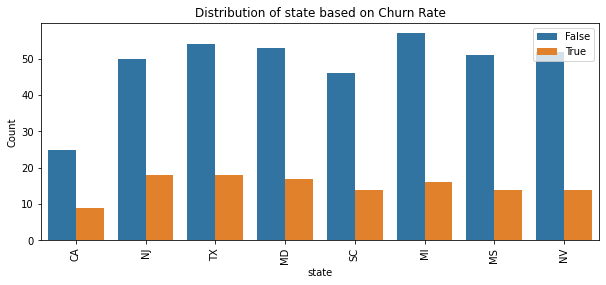

In [46]:
plot_categorical_distribution(df, 'state')

Customers that churned, majority are from Texas, New Jersey, Maryland and Miami

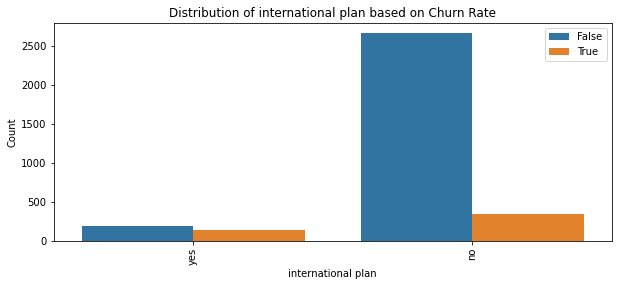

In [47]:
plot_categorical_distribution(df, 'international plan')

The data indicates that most of the customers who terminated their contracts did not have an international plan.

In [52]:
def plot_churn_kde(df, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

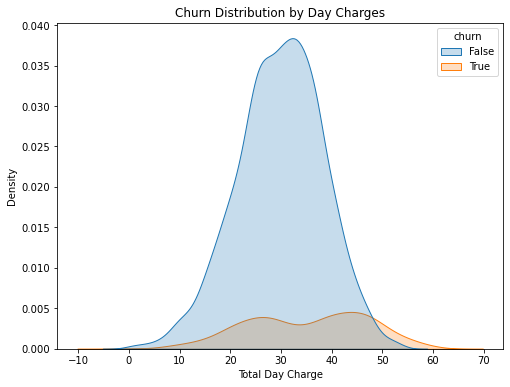

In [53]:
# Churn by day charges
plot_churn_kde(df, 'total day charge', 'Day')

The Kernel Density Estimation (KDE) plot representing churn based on daily charges highlights a significant pattern: customers who have ended their accounts tend to have higher total day charges compared to those who haven't churned. This suggests that customers who perceive the service as too expensive during daytime hours or are dissatisfied with it might be more likely to churn.

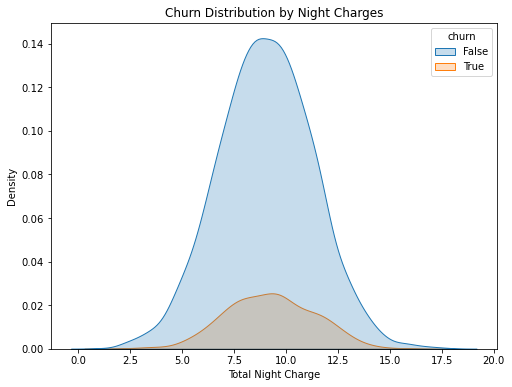

In [54]:
plot_churn_kde(df, 'total night charge', 'Night')

The trend observed in the churn by night charges plot shows that of the churn by day charges and churn by evening charges plots. Customers who have ended their accounts generally exhibit higher total night charges compared to customers who have not terminated their accounts.

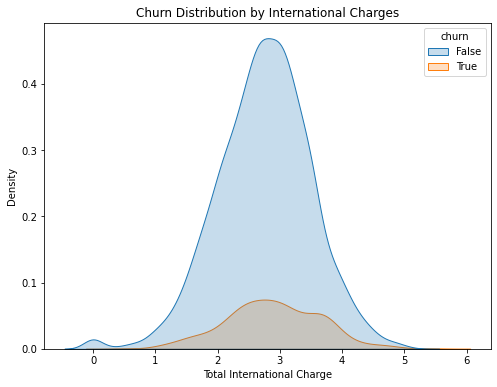

In [55]:
plot_churn_kde(df, 'total intl charge', 'International')

Based on the distribution, customers with higher total international charges are slightly more prone to churning.

3.3 Multivariate Analysis

3.3.1 Numerical Features 

In [48]:
# We categorize columns with float or integer data types as numerical columns.
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [50]:
# numerical columns
num_cols = df.select_dtypes(include=["number"])

# create a new DataFrame from the numerical columns
num_df = pd.DataFrame(num_cols)
num_df

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


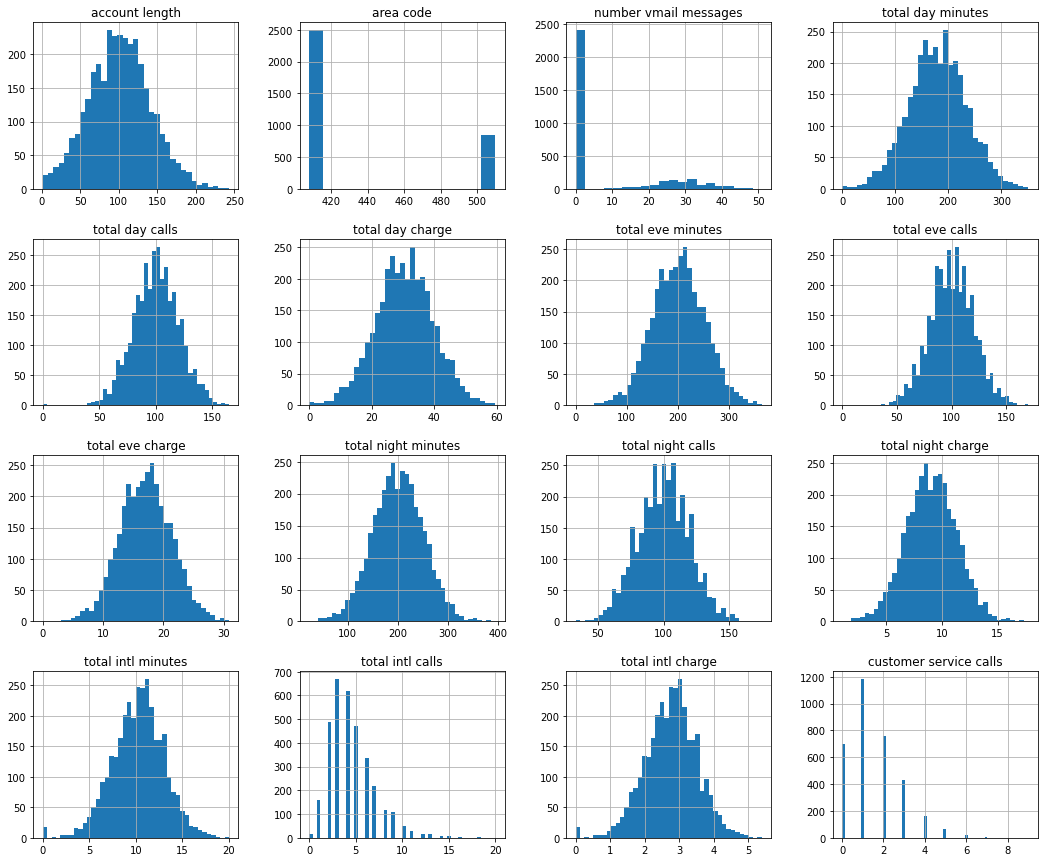

In [51]:
num_df.hist(figsize=(18,15), bins="auto");

We notice that the majority of the data follows a normal distribution, except for total international calls, customer service calls, area code, and voice message plan.

Pairplots for Numeric Features (Hue as "Churn")
let's do a pairplot to see how the features relate to each other using hue = "churn"

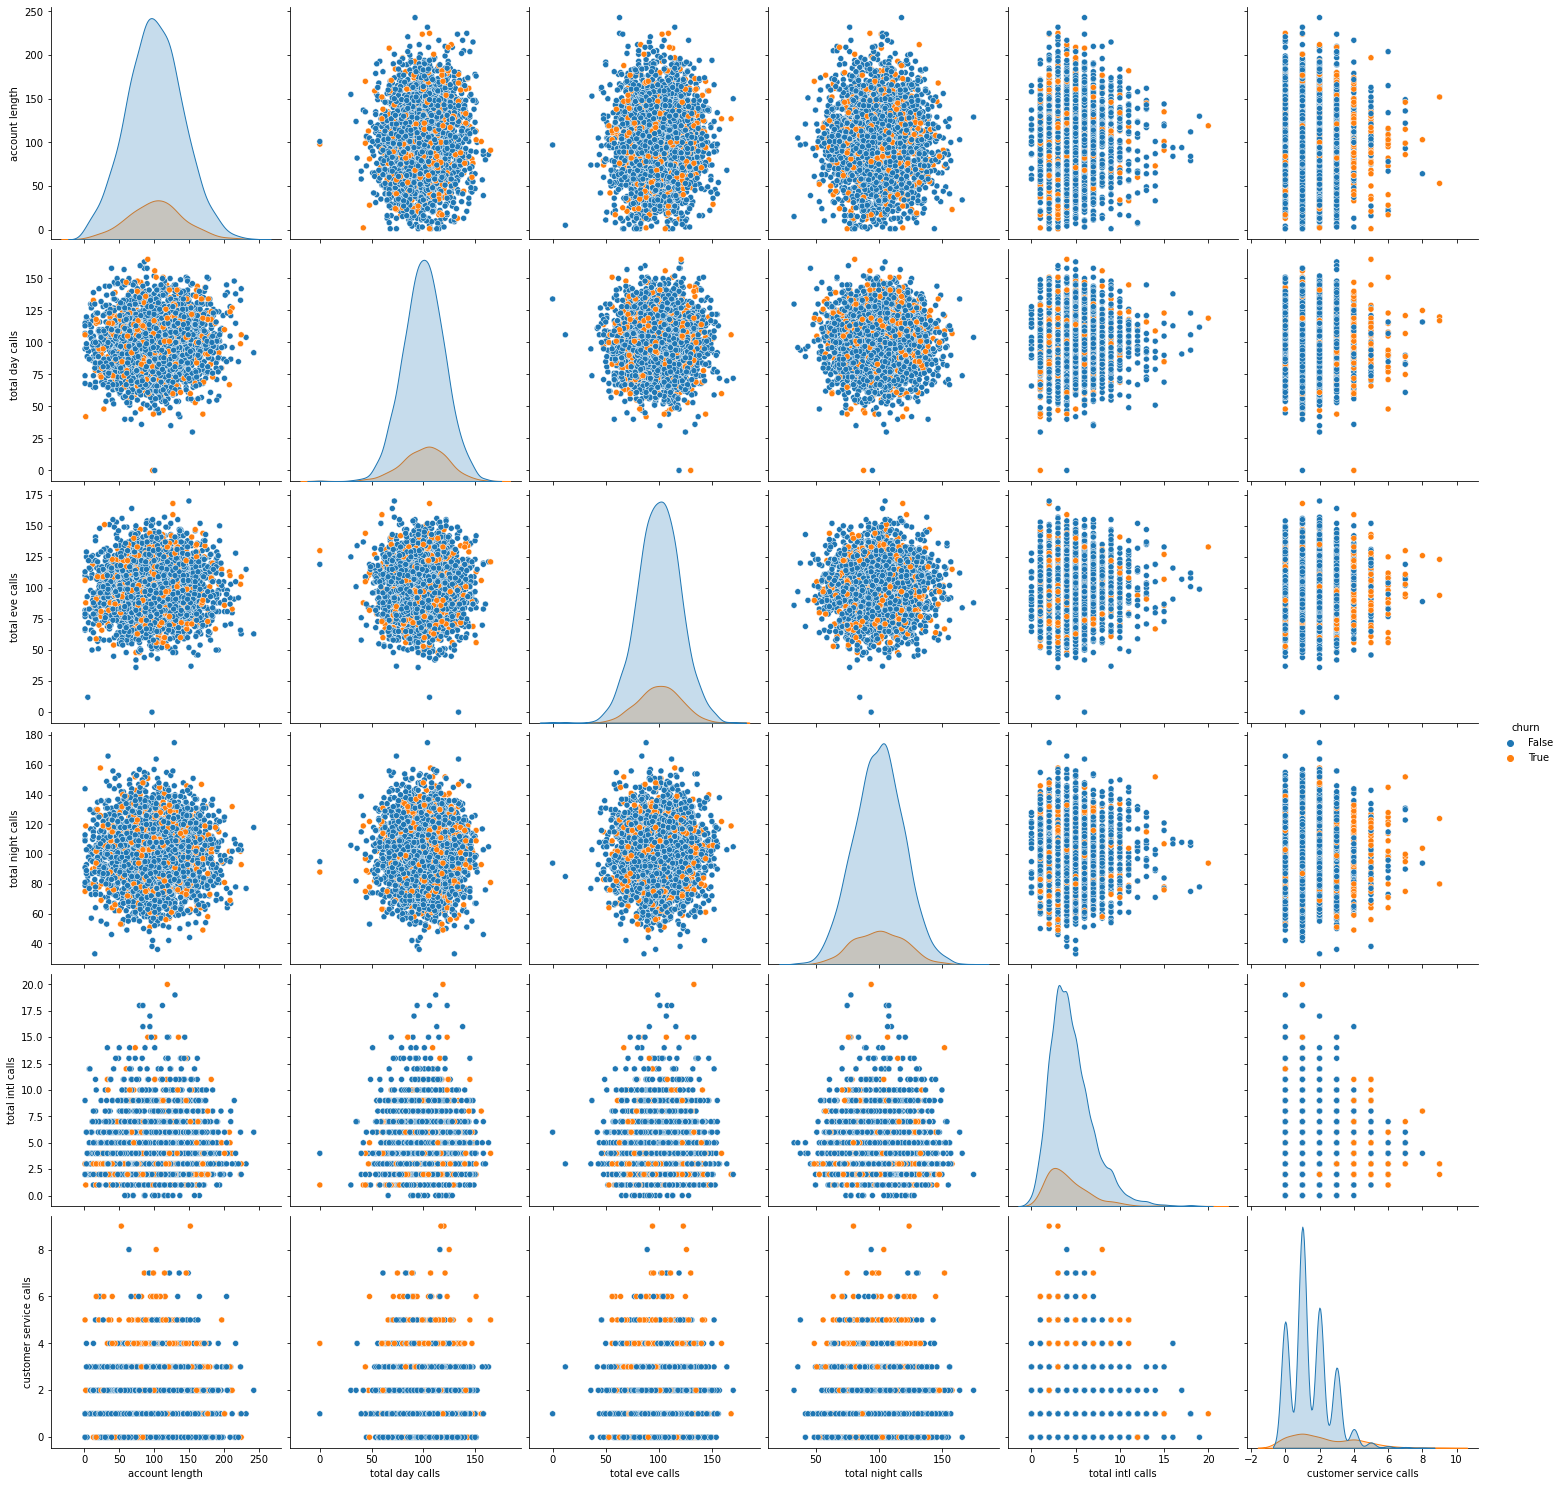

In [60]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=3.5);
plt.show();

Customers with a low number of daytime calls exhibited a higher churn rate.

Customers with a low number of evening calls showed a higher churn rate.

Customers with a low number of international calls had a higher churn rate, despite the positively skewed nature of the data.

Customers with shorter account length had higher churn rates

Checking for Correlation

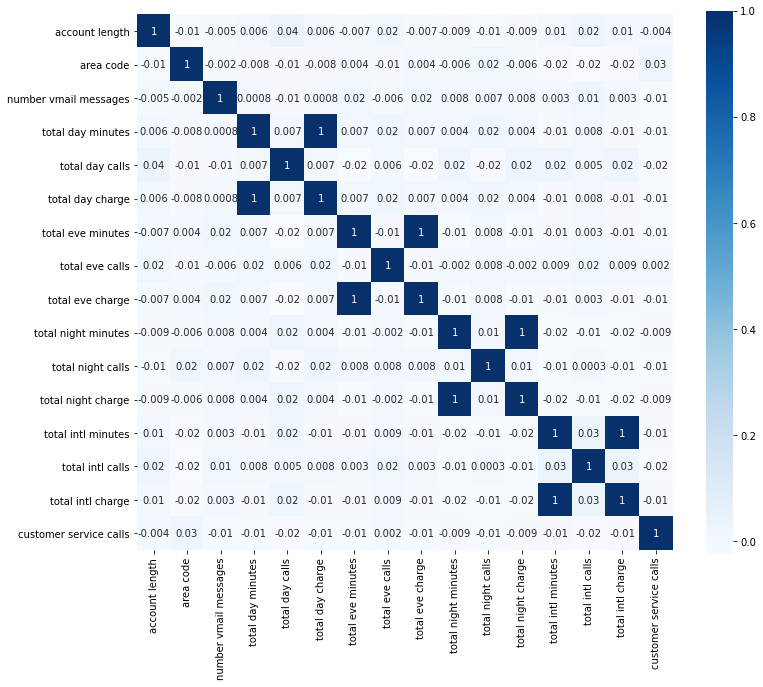

In [66]:
corr_mat = num_df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(12,10))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Blue indicates high correlation. Upon observation, Blue squares along the diagonal represent the correlation of a feature with itself, which is always 1. Blue squares outside this diagonal suggest highly correlated features. In this dataset, high correlations exist between total day minutes and total day charge, total evening minutes and total evening charge, total night minutes and total night charge, as well as total international minutes and total international charge. Some of the features that are close to the 0 mean that there is no linear relationship between the features It's necessary to drop highly correlated features before modeling.

In [69]:
#Checking for Multicollinearity

df_corr = num_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.90) & (df_corr.cc<1)]

,cc
pairs,
"(total day minutes, total day charge)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993


This shows the multicollineared features; the results is true as high total minutes = total charge. Therefore we will drop 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'.

In [119]:
#Define Categorical columns
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].dtype == 'bool':
        categorical_cols.append(col)
categorical_cols

[]

In [136]:
# iterate over each categorical column
for cat_col in categorical_cols:
    # create a figure with a specific size
    plt.figure(figsize=(10,6))

    # create a countplot with hue as "churn" and order based on the top 15 values
    sns.countplot(x=cat_col, hue="churn", data=df, order=df[cat_col].value_counts().iloc[0:15].index)
    
    # rotate the x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # add a legend to the chart
    plt.legend(loc="upper right")
    
    # add a title to the chart
    plt.title("Churn Rates by " + cat_col)
    
    # display the chart
    plt.show()

The analysis of categorical features reveals that the "phone number" column doesn't provide meaningful information about customer churn. Therefore, we'll remove this column. Additionally, since "churn" is our target variable, we'll exclude it from the dataset.

To deal with categorical data, we shall label encode

In [138]:
# Converting the columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,16,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [123]:
#transform the categorical variable churn
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['state'] = label_encoder.fit_transform(df['state'])
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,16,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int32  
 3   voice mail plan         3333 non-null   int32  
 4   number vmail messages   3333 non-null   int64  
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  total intl charge       3333 non-null   float64
 13  customer service calls  3333 non-null   int64  
 14  churn                   3333 non-null   

We have replaced for international plan "yes" to 1 and "no" to 0, for voice mail plan "yes" to 1 and "no" to 0, and churn "True" to 1 and "False" to 0

## 4.Modeling

The dataset we're analyzing presents a binary classification challenge aimed at predicting churn, i.e., whether a customer will leave or not. Our approach involves utilizing a basic logistic regression model, with evaluation based on the recall score. Success criteria are set at achieving a recall score of 75% or higher.

To fulfill the objectives outlined in the project proposal, we intend to utilize a variety of machine learning algorithms. These selected algorithms offer distinct advantages and are tailored to address different aspects of the project requirements. The algorithms we'll be employing include:

Logistic Regression

Decision Tree

Random Forest


4.1 Define X and y

In [124]:
#Data Splitting
#Features
X = df.drop('churn', axis=1)  
#Target variable
y = df['churn'] 

In [125]:
X.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,16,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,35,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,31,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,35,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,36,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3


4.2 Train_Test Split

Train-Test Split Splitting data into train and test sets using a test_size of 0.2and a random_state 0

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Using Synthetic Minority Over-sampling Technique to deal with class imbalance in the target variable

In [127]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC
smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

4.1.1 Model 1: Logistic Regression

In [128]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=123)

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
# Calculate accuracy and AUC for train data
accuracy = accuracy_score(y_train, y_hat_train) 
print('Train Accuracy is: {0}'.format(round(accuracy, 2)))

# Calculate accuracy and AUC for test data
accuracy = accuracy_score(y_test, y_hat_test)
print('Test Accuracy is: {0}'.format(round(accuracy, 3)))

Train Accuracy is: 0.86
Test Accuracy is: 0.868


The train accuracy being slightly lower than the test accuracy (0.86 vs. 0.868) is a good sign. It suggests that model is not overfitting to the training data excessively, meaning it's not memorizing the training data but generalizing well to new, unseen data.

In [154]:
# Fit the model on the training data 
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)

In [155]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

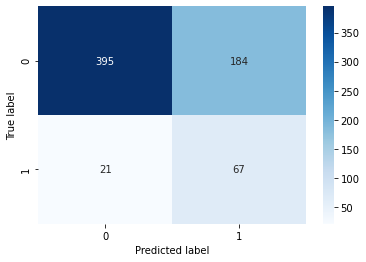

In [156]:
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [157]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       579
           1       0.27      0.76      0.40        88

    accuracy                           0.69       667
   macro avg       0.61      0.72      0.59       667
weighted avg       0.86      0.69      0.74       667



The logistic regression model did a good job with a recall score of 0.76, especially considering it's just a basic model. This score means it can spot about 76% of the real positive cases accurately. Even though it's a simple model, it's effective at finding the important cases, which makes it useful for predictions.

Looking at the confusion matrix, the model gets a lot of predictions right, both when it predicts something is positive and when it predicts something is negative. This suggests that the model is reliable and doesn't make too many mistakes. It's good at classifying both positive and negative cases accurately.

4.1.2 Model 2: Decision Tree

In [160]:
# build a decision tree model
#instatiate model
dtc = DecisionTreeClassifier()

#fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [163]:
# Make predictions on the testing data
y_pred = dtc.predict(X_test)

In [166]:
# Evaluate the model
print("Training accuracy:", dtc.score(X_train, y_train))
print("Testing accuracy:", dtc.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.904047976011994


The model achieved a perfect training accuracy of 1.0, meaning it accurately predicted all the samples in the training data. However, the testing accuracy, which is 0.904, suggests that the model performed slightly worse on unseen data. This drop in accuracy from training to testing data might indicate some overfitting, where the model has learned to memorize the training data rather than generalize well to new data. Despite this, a testing accuracy of 0.904 still indicates strong performance, meaning the model accurately predicted about 90.4% of the samples in the test dataset.

In [167]:
#evaluate the model on the selected features
y_pred = dtc.predict(X_test)

# Evaluate the performance of the model

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1_score:', f1_score(y_test, y_pred))

Accuracy: 0.904047976011994
Precision: 0.6052631578947368
Recall: 0.7840909090909091
F1_score: 0.6831683168316832


- The accuracy of the model is 0.904, indicating that it correctly predicted about 90.4% of the samples.

- The precision of the model is 0.605, meaning that out of all the samples predicted as positive, about 60.5% were actually positive.

- The recall of the model is 0.784, suggesting that it correctly identified about 78.4% of all actual positive samples.

- The F1 score, which combines both precision and recall, is 0.683, representing the balance between precision and recall. It's a harmonic mean of precision and recall, providing a single score that summarizes both metrics.

- These metrics collectively show that the model has relatively high accuracy and recall, indicating it performs well at identifying positive instances

In [169]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8531853509185114


The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) score is a measure of the ability of a classification model to discriminate between positive and negative classes across different thresholds.

Here's how to interpret the AUC-ROC score:

A score of 1 indicates perfect discrimination, meaning the model is capable of perfectly distinguishing between positive and negative instances.

A score of 0.5 suggests the model's performance is no better than random guessing, where the curve coincides with the diagonal line (the line of no-discrimination).
A score below 0.5 indicates worse than random performance, implying that the model's predictions are inversely related to the true labels.

In this case, the AUC-ROC score is 0.853. This indicates that the model performs quite well in distinguishing between positive and negative instances, with a relatively high degree of discrimination. Generally, an AUC-ROC score above 0.8 is considered good, so a score of 0.853 suggests that the model has strong discriminatory power and is effective in making predictions.

[[534  45]
 [ 19  69]]


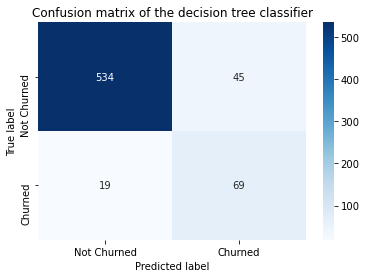

In [172]:
print(confusion_matrix(y_test, y_pred))
# assuming y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Churned', 'Churned']
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
title = 'Confusion matrix of the decision tree classifier'
plt.title(title)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

- True Negatives (TN): 534 instances were correctly predicted as "Not Churned."

- False Positives (FP): 45 instances were incorrectly predicted as "Churned" when they were actually "Not Churned."

- False Negatives (FN): 19 instances were incorrectly predicted as "Not Churned" when they were actually "Churned."

- True Positives (TP): 69 instances were correctly predicted as "Churned."


In [173]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       579
           1       0.40      0.80      0.53        88

    accuracy                           0.81       667
   macro avg       0.68      0.81      0.71       667
weighted avg       0.89      0.81      0.84       667



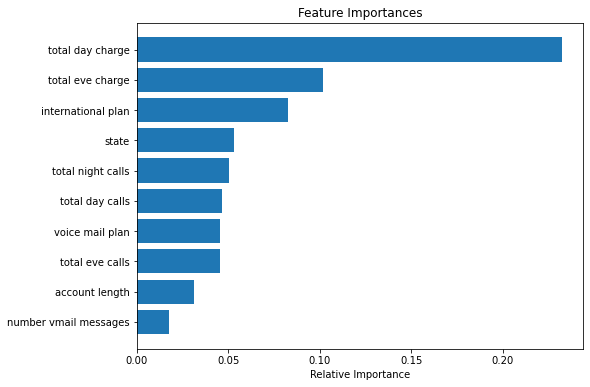

In [174]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The feature importance analysis of the model identifies three key influential factors: total day charge, total evening charge, and total international charge. These features are crucial contributors, suggesting that the model heavily considers the total charges accrued during daytime, evening, and international periods. This understanding of feature importance offers valuable insights into what drives the model's decisions and directs attention towards areas that may require further exploration or improvement in the model.

Perform feature selection

used for pinpointing and eliminating irrelevant or duplicate features.

4.1.3 Random Forest Classifier

Additionally, an ensemble method was employed for feature selection, utilizing the random forest algorithm. In this methodology, feature importances were determined by assessing the average decrease in impurity across all decision trees within the random forest.

In [175]:
# Train a random forest classifier on the full dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Select the top k features
k = 10
selected_indices = sorted_indices[:k]
selected_features = X.columns[selected_indices]

# Convert selected features into a DataFrame
df_selected_features = X[selected_features]
df_selected_features.head()

,total day charge,customer service calls,total eve charge,international plan,total intl charge,total night charge,total intl calls,total day calls,account length,total night calls
0,45.07,1,16.78,0,2.70,11.01,3,110,128,91
1,27.47,1,16.62,0,3.70,11.45,3,123,107,103
2,41.38,0,10.30,0,3.29,7.32,5,114,137,104
3,50.90,2,5.26,1,1.78,8.86,7,71,84,89
4,28.34,3,12.61,1,2.73,8.41,3,113,75,121


In [176]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_selected_features, y, test_size=0.2, random_state=42)

In [177]:
# Train a new random forest classifier on the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train2, y_train2)

# Evaluate the accuracy on the test set
acc = rf_selected.score(X_test2, y_test2)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.924


In [178]:
df_selected_features = df[selected_features].reset_index(drop=True)


# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_selected_features, y, test_size=0.2, random_state=42)

In [179]:
#evaluate the model on the selected features
y_pred2 = rf_selected.predict(X_test2)

#evaluate the model
print('Accuracy:', accuracy_score(y_test2, y_pred2))
print('Precision:', precision_score(y_test2, y_pred2))
print('Recall:', recall_score(y_test2, y_pred2))
print('F1_score:', f1_score(y_test2, y_pred2))

Accuracy: 0.9235382308845578
Precision: 0.8378378378378378
Recall: 0.6138613861386139
F1_score: 0.7085714285714285


After implementing feature selection, the model's F1-score has increased to 0.709, showing a notable enhancement from the original model's F1-score of 0.685.

This indicates that the feature selection process has aided the model in capturing the underlying data patterns more effectively, leading to improved performance.

However, the relatively modest recall score of 0.614 suggests that the model might still overlook some instances of churn. Hence, additional enhancements could involve exploring alternative techniques such as ensemble methods and fine-tuning hyperparameters to refine the model further.

Following feature selection, the AUC-ROC score decreased notably to 0.512.

This indicates a considerable decline from the previous score. A value of 0.512 implies that the model's capability to distinguish between positive and negative classes has diminished significantly after implementing feature selection.

In [181]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [183]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)

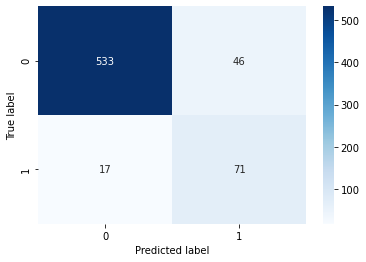

In [184]:
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [185]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       579
           1       0.61      0.81      0.69        88

    accuracy                           0.91       667
   macro avg       0.79      0.86      0.82       667
weighted avg       0.92      0.91      0.91       667



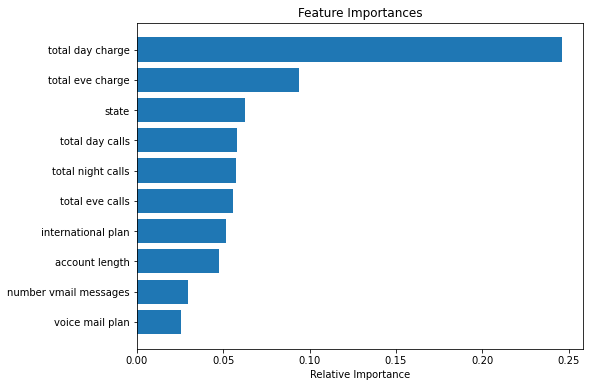

In [186]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The random forest classifier model demonstrates an improved recall score of 0.79, indicating a significant enhancement over its previous performance. This suggests that the model accurately identifies approximately 79% of the actual positive instances.

- Upon examining the confusion matrix, it is clear that the model achieves a higher count of true positives and true negatives compared to false positives and false negatives. This highlights the model's strong performance, as it makes correct predictions more often than incorrect ones, suggesting it successfully avoids overfitting.

- According to the model's analysis, the top three most influential features are total day charge, total international calls, and total evening charge.

5 Model Evaluation

In [191]:
np.random.seed(123)

# Assuming resampled_X_train, resampled_y_train, X1_test, and y_test are defined earlier

classifiers = {'Logistic Regression': LogisticRegression(),
               'Random Forest': RandomForestClassifier(),
               'Decision Tree': DecisionTreeClassifier()}

results = []

# Train the models and record the results
for name, clf in classifiers.items():
    model = clf.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    results.append({'Classifier': name, 'Recall': recall})

# Create a DataFrame from the results
result_table = pd.DataFrame(results)

print(result_table)

            Classifier    Recall
0  Logistic Regression  0.761364
1        Random Forest  0.806818
2        Decision Tree  0.795455


The results above shows that RandomForestClassifier has the highest score followed by DecisionTreeClassifier and The  Logistic Regression has the lowest recall score of 0.76.

Models Comparison - ROC Curve

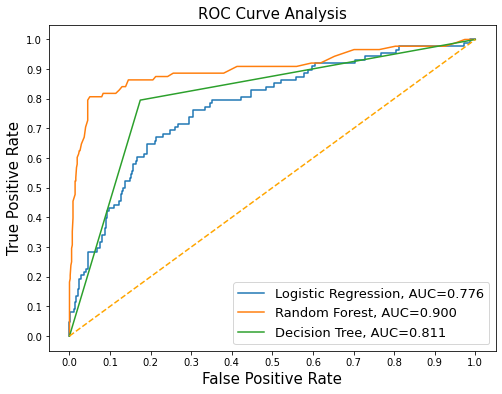

In [193]:
# Set a seed for reproducibility
np.random.seed(123)

classifiers = {'Logistic Regression': LogisticRegression(),
               'Random Forest': RandomForestClassifier(),
               'Decision Tree': DecisionTreeClassifier()}

# Define lists to store results
fpr_list = []
tpr_list = []
auc_list = []

# Train the models and record the results
for name, cls in classifiers.items():
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    # Store results in lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))

for i in range(len(classifiers)):
    plt.plot(fpr_list[i], tpr_list[i], label="{}, AUC={:.3f}".format(list(classifiers.keys())[i], auc_list[i]))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

The analysis of ROC curves reveals varying performance levels among the classifiers, with RandomForestClassifier demonstrating the most robust performance, followed by DecisionTreeClassifier and LogisticRegression, in descending order. Notably, RandomForestClassifier achieves the highest AUC score of 0.900, indicating superior discrimination between positive and negative instances. Conversely, the LogisticRegression model attains the lowest AUC score at 0.776.

The ROC curve visually illustrates the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for a binary classifier. TPR measures the accuracy of positive instance predictions, while FPR indicates the rate of misclassification for negative instances. The AUC, representing the area under the ROC curve, provides a comprehensive metric for evaluating classifier performance.

A higher AUC score signifies an improved ability of the classifier to effectively differentiate between positive and negative instances. In this context, the superior AUC score of RandomForestClassifier highlights its proficiency in making accurate predictions, solidifying its position as the top-performing classifier in the analyzed set

5.1 Model Tuning/hyperparameter tuning

The process of optimizing the hyperparameters of a machine learning model to improve its performance

In [195]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Set a seed for reproducibility
np.random.seed(123)

# Define a smaller hyperparameter grid
param_dist = {
    "max_depth": [8, 15],
    "n_estimators": [500],
    "min_samples_split": [5, 10],
    "criterion": ['entropy', 'gini']
}

# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state=123)

# Create RandomizedSearchCV object with the defined parameter grid and scoring metric
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=4, cv=2, n_jobs=-1, random_state=123, verbose=1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print("Best parameters:", random_search.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   13.8s finished


Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 15, 'criterion': 'gini'}


In [196]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 15,
                                  min_samples_split = 5,
                                  n_estimators = 500,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=500, random_state=123)

In [198]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

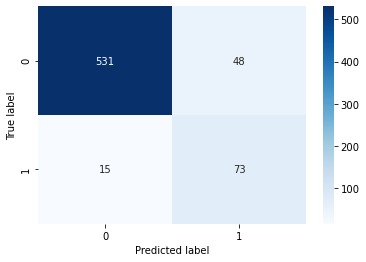

In [199]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [200]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       579
           1       0.60      0.83      0.70        88

    accuracy                           0.91       667
   macro avg       0.79      0.87      0.82       667
weighted avg       0.92      0.91      0.91       667



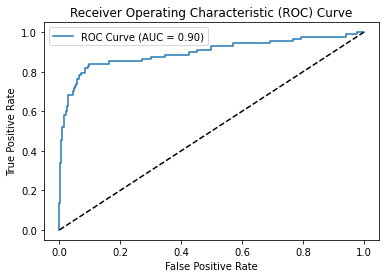

In [203]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

# Perform cross-validation and get predicted probabilities
y_proba_cv = cross_val_predict(rf_tuned, X_test, y_test, cv=5, method='predict_proba')[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_test, y_proba_cv)

# Compute the AUC score
auc_score_cv = roc_auc_score(y_test, y_proba_cv)

# Plot the ROC curve
plt.plot(fpr_cv, tpr_cv, label='ROC Curve (AUC = {:.2f})'.format(auc_score_cv))
# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

AUC-ROC score of 0.90 means that the classifieris able to distinguish between the True and False with regards to customer Churn .
The optimized Random Forest model exhibits robust performance, especially in accurately distinguishing between churned and non-churned customers. Notably, it achieves a recall score of 0.76, indicating its capability to correctly identify 76% of the actual churned customers.

The model demonstrated strong performance with high accuracy and AUC - ROC score, indicating its ability to effectively classify instances. However, it showed slightly lower precision and recall scores, suggesting that while it can accurately identify a significant portion of churners, it also tends to make some false positive predictions.

## Conclusion

Based on the findings, the business conclusion is as follows:

- Emphasis on Recall: In the realm of predicting customer churn, priority was given to optimizing for Recall. This strategy aimed to minimize the misclassification of churners as non-churners, ensuring that the model effectively identifies customers at risk of leaving.

- Optimal Model: Among the explored models, the Random Forest classifier stood out as the top performer, 

- Key Churn Influencers: Factors such as total day charge, customer service calls, and the number of voice mail messages emerged as significant contributors to customer churn.

- With additional time, there's an opportunity to conduct a thorough exploration of potential features and their influence on the model. This may involve analyzing customer behavior, transaction patterns, or other relevant variables that could contribute valuable information for predicting churn.

- Continuous Improvement: Predicting customer churn is an ongoing endeavor, necessitating constant refinement of the model. Regular monitoring, data collection, and incorporating feedback from stakeholders are crucial for enhancing predictive accuracy and identifying at-risk customers effectively.

## Recommendation

- To address the observed higher churn rates in area codes 415 and 510, it's advised to deploy focused promotional tactics. This entails extending targeted discounts and promotional deals to customers within these regions. By offering incentives like exclusive discounts, the objective is to cultivate customer loyalty and deter churn. This tailored strategy acknowledges the distinct attributes and issues associated with these particular geographical areas.


- In states exhibiting notably elevated churn rates like Texas, New Jersey, Maryland, Miami, and New York, it's recommended to adopt a targeted approach to customer retention. This could include executing personalized marketing efforts, customized promotional deals, and improved customer support programs. Identifying and catering to the unique requirements and preferences of customers in these states is essential for building stronger relationships and mitigating churn.


- An assessment of the current pricing framework for day, evening, night, and international rates is advised. Given the influence of charges on customer churn decisions, it's proposed to examine potential modifications to pricing schemes or the introduction of discounted bundles. This strategic review of pricing aims to rectify any inconsistencies and enhance the competitiveness of the company's offerings, thereby alleviating factors contributing to customer churn.

- The company should ensure continoous prediction of the factors influencing churn by contionously collecting new data and improving the model as prediction is an ongoing process.